**Assignment 1 - Question 2**

**Ryan Reed**

**COS 470**

In [420]:
import pandas as pd
import re
# utility function to clean the string and return a list of words
def string_cleaner(string):
  # remove xml tags
  string =  re.sub('<[^<]+>', "",  string)
  string =  re.sub('\n', "",  string)
  string =  re.sub('/', "",  string)
  string =  re.sub('-', " ",  string)
  # clean punctuation
  clean_words = re.sub(r"[(,.;@#?*\":'%!&$)]+\ *", " ", string.lower())
  split_words = re.split(" ",clean_words)
  #remove empty strings
  while("" in split_words) :
    split_words.remove("")
  
  #list of split words is now clean information, not raw data
  return split_words

In [421]:
from post_parser_record import PostParserRecord
post_reader = PostParserRecord("Posts_Coffee.xml")
# dict will hold (word, [postings]) , where each posting is the post_ID
postings_dict = {}

for question in post_reader.map_questions: # question posts
  post_contents = post_reader.map_questions[question].title + post_reader.map_questions[question].body
  cleaned_post_contents = string_cleaner(post_contents)

  curr_post_id = post_reader.map_questions[question].post_id
  for word in cleaned_post_contents:
    if word not in postings_dict:
      postings_dict[word] = []
    if curr_post_id not in postings_dict[word]:
      postings_dict[word].append(curr_post_id)

df_postings = pd.DataFrame(postings_dict.items(), columns=['Word', 'post_ids'])
df_postings

,Word,post_ids
0,how,"[1, 2, 5, 12, 13, 16, 36, 38, 43, 44, 52, 53, ..."
1,should,"[1, 2, 12, 36, 38, 48, 54, 100, 104, 111, 113,..."
2,i,"[1, 2, 3, 4, 5, 9, 10, 12, 13, 14, 25, 28, 29,..."
3,store,"[1, 12, 13, 104, 113, 123, 193, 245, 295, 1668..."
4,whole,"[1, 12, 115, 150, 236, 285, 325, 326, 1595, 16..."
...,...,...
8868,cleans,[5928]
8869,privilege,[5928]
8870,whomever,[5928]
8871,raised,[5928]


In [422]:
# intersecting two postings lists
def intersect(p1, p2, operation):
  result = []
  if operation == 'AND': # if operation to perform is AND
    for elementP1 in p1:
      for elementP2 in p2:
        result = sorted([post_id_val for post_id_val in elementP1 if post_id_val in elementP2])
  elif (operation == 'OR'): # if operation to perform is OR
    for elementP1 in p1:
      for elementP2 in p2:
        result = sorted([post_id_val for post_id_val in (elementP1 + elementP2)])

  elif operation == 'NAND': # if operation to perform is AND
    for elementP1 in p1:
      if (len(p2) == 0):
        result = [post_id_val for post_id_val in elementP1] 
      else:
        for elementP2 in p2:
          result = sorted([post_id_val for post_id_val in elementP1 if post_id_val not in elementP2])

  return result

**Part 1: Queries Below (a, b, c, d)**

In [423]:
#a
query1 = df_postings.query('(Word == "espresso")')['post_ids']

#b
query2turkish = df_postings.query('(Word == "turkish")')['post_ids']
query2coffee = df_postings.query('(Word == "coffee")')['post_ids']
query2 = intersect(query2turkish, query2coffee, "AND")

#c
query3 = intersect(query2turkish, query2coffee, "OR")

#d
query4persian = df_postings.query('(Word == "persian")')['post_ids']
query4 = intersect(query2coffee, query4persian, "NAND")

**Top-10 Query Results Table**

In [424]:
from functools import reduce

results_dict = {'Query': ['espresso', 'turkish AND coffee', 'turkish OR coffee', 'coffee NAND persian'],
                'post_ids':[reduce(lambda x: x, query1)[:10], query2[:10], query3[:10], query4[:10]]}
results_df = pd.DataFrame(data = results_dict)
results_df

,Query,post_ids
0,espresso,"[2, 5, 9, 10, 26, 36, 93, 94, 95, 97]"
1,turkish AND coffee,"[81, 209, 349, 483, 1542, 1761, 1833, 1998, 21..."
2,turkish OR coffee,"[1, 2, 3, 4, 5, 6, 9, 10, 12, 13]"
3,coffee NAND persian,"[1, 2, 3, 4, 5, 6, 9, 10, 12, 13]"


Query 1 -> 1 | 1 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0

Query 2 -> 0 | 1 | 0 | 1 | 0 | 1 | 1 | 1 | 1 | 1

Query 3 -> 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0

Query 4 -> 0 | 1 | 1 | 1 | 1 | 0 | 1 | 0 | 0 | 0

**Precision and Recall in Table Below**


In [427]:

q1_precision = [1.00, 1.00, 0.66, 0.50, 0.40, 0.50, 0.43, 0.375, 0.33, 0.30]
q1_recall = [0.33, 0.66, 0.66, 0.66, 0.66, 1.00, 1.00, 1.00, 1.00, 1.00]

q2_precision = [0.00, 0.50, 0.33, 0.50, 0.40, 0.50, 0.57, 0.63, 0.66, 0.70]
q2_recall = [0.00, 0.14, 0.14, 0.29, 0.29, 0.43, 0.57, 0.71, 0.88, 1.00]

q3_precision = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
q3_recall = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]

q4_precision = [0.00, 0.50, 0.66, 0.75, 0.80, 0.66, 0.71, 0.63, 0.55, 0.50]
q4_recall = [0.00, 0.20, 0.40, 0.60, 0.80, 0.80, 1.00, 1.00, 1.00, 1.00]

In [428]:
q_df = pd.DataFrame({'Q1_Precision': q1_precision, 'Q1_Recall': q1_recall,
                     'Q2_Precision': q2_precision, 'Q2_Recall': q2_recall,
                     'Q3_Precision': q3_precision, 'Q3_Recall': q3_recall,
                     'Q4_Precision': q4_precision, 'Q4_Recall': q4_recall,})
q_df

,Q1_Precision,Q1_Recall,Q2_Precision,Q2_Recall,Q3_Precision,Q3_Recall,Q4_Precision,Q4_Recall
0,1.000,0.33,0.00,0.00,0.0,0.0,0.00,0.0
1,1.000,0.66,0.50,0.14,0.0,0.0,0.50,0.2
2,0.660,0.66,0.33,0.14,0.0,0.0,0.66,0.4
3,0.500,0.66,0.50,0.29,0.0,0.0,0.75,0.6
4,0.400,0.66,0.40,0.29,0.0,0.0,0.80,0.8
5,0.500,1.00,0.50,0.43,0.0,0.0,0.66,0.8
6,0.430,1.00,0.57,0.57,0.0,0.0,0.71,1.0
7,0.375,1.00,0.63,0.71,0.0,0.0,0.63,1.0
8,0.330,1.00,0.66,0.88,0.0,0.0,0.55,1.0
9,0.300,1.00,0.70,1.00,0.0,0.0,0.50,1.0


**'b' and 'c' Discussion below:**

Results from (turkish AND coffee) and (turkish OR coffee) varied quite significantly. It might be because of my discretion, but the OR query returned no relevant results. Looking at the data, this is mainly because 'coffee' appears in almost every post, while 'turkish' appears in very few. When looking at the first 10 values, none of the OR posts had anything to specifically with the information need (making turkish coffee), but included making drip coffee or espresso. The AND retrieval, did retrieve 7 relevant posts of the top-10 posts, all focused on topics around making turkish coffee.

**Precision-Recall graph for each query, as well as discussion below:**

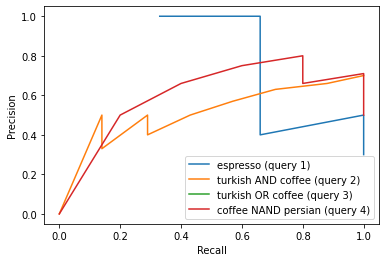

In [426]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(q1_recall, q1_precision, label = "espresso (query 1)")
plt.plot(q2_recall, q2_precision, label = "turkish AND coffee (query 2)")
plt.plot(q3_recall, q3_precision, label = "turkish OR coffee (query 3)")
plt.plot(q4_recall, q4_precision, label = "coffee NAND persian (query 4)")

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.show()


**Query 1 :** Starts out with high precision that steadily drops.

**Query 2 :** Experiences high precision growth in the beginning, which drops slightly, and continues growing *almost* steadily.

**Query 3 :** Not present on graph as it returned no relevant documents.

**Query 4 :** Precision grows steadily, drops, and then grows.

**Overall observations:** Query 1 (espresso) shows the highest initial precision, but it rapidly decreases. Query 4 (coffee NAND persian) shows the best steady precision growth, but query 2 (turkish AND coffee) shows the greatest final-precision value with top-10.